In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from tqdm import tqdm_notebook

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [3]:
def summary(df) :
    pd.set_option('display.max_rows', 100)
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes, 
                        '비 결측치 수(notnull' : df.notnull().sum(),
                        '결측치 수(null)' : df.isnull().sum(), 
                        '고유값 수(nunique)' : df.nunique()})
    return tf

In [4]:
df = pd.read_pickle('../data/result.pkl')
# 제목이 같은 항목 삭제 및 마지막 레코드만 남김
df = df.drop_duplicates(subset=['일자','언론사', '본문'], keep="last")
df = df.dropna(subset=['특성추출(가중치순 상위 50개)'], axis=0)
df['일자'].max(); df['일자'].min()
df.head()
df.shape

Timestamp('2022-02-28 00:00:00')

Timestamp('2017-01-01 00:00:00')

,일자,언론사,통합 분류1,통합 분류2,통합 분류3,키워드,특성추출(가중치순 상위 50개),본문
8674,2020-03-20,중도일보,경제>자원,경제>유통,지역>경남,"순수,국산,수매,밀가루,시범,판매,농산물,면역,증진,효과,노화,억제,한국농수산식품유...","시범판매,밀가루,농산물,밀산업,자급률,병해충,소비자,육성법,소비량,신규제품,16톤,...","한국농수산식품유통공사(aT, 사장 이병호)는 지난해 수매한 국산 밀가루 16톤을 오..."
8675,2020-03-20,중도일보,지역>전북,지역>전남,지역>강원,"물고기,채소농사,고창군,아쿠아포닉스,채소,전국,출하,아쿠아포닉스,농법,착공,시설,출...","아쿠아포닉스,고창군,고창군청,지원사업,이영성,아쿠아포닉스코리아,재배법,수경재배,환경...",전북 고창군의 한 농장이 물고기 양식장에서 나온 유기물로 작물을 재배하는 '아쿠아포...
8678,2020-03-20,전북도민일보,지역>충북,지역>대전,지역>전북,"남부안농협,토양,개량제,무상,지원,남부안농협,조합장,최우식,로컬,푸드,농산물,생산,...","남부안농협,로컬푸드,토양개량제,직매장,농산물,고품질,무상지원,농가소득,732포,최우...",남부안농협(조합장 최우식)은 로컬푸드 고품질 농산물 생산을 위한 토양개량 지원사업...
8687,2020-03-20,충청투데이,경제>유통,경제>자원,NaN,"취나물,부여,백마강,부여군농업기술센터,남면,지역,백마강,취나물,출하,본격적,시작,1...","면역력,백마강,부여군,관계자,부여군농업기술센터,병해충,클로로젠산,농약허용물질목록관리...",[충청투데이 김일순 기자] 부여군농업기술센터는 남면 지역에서 고품질 백마강 취나물 ...
8689,2020-03-19,대전일보,지역>경기,지역>충남,경제>자원,"보령시,공모,타작물,생산,장비,지원,사업,보령,보령시,타작물,재배,확산,타작물,재배...","타작물,보령시,농업인,간척지,ha,연명부,소재지,기반정비,선별기,방제기,수확기,농기...",[보령] 보령시는 논 타작물 재배 확산을 위해 타작물 재배에 필요한 기반정비 및 생...


(570265, 8)

In [7]:
for i in df['본문'][100:105]:
    i

'당진시학교급식지원센터가 직영 1년을 앞두고 있다. 갑작스런 위 수탁계약의 해지로 많은 우려 속에서 시작된 시의 직접 운영은 지난 1년간 학교급식 식재료를 차질 없이 공급하기 위한 끊임없는 노력으로 어느덧 안정적인 운영체계를 완성해가고 있다. 특히 검수와 작부구축 전담 공무원 채용, 공공급식조례 제정, 학교급식특별회계 설치 등으로 직영 운영의 기반이 마련..'

'[당진]당진시학교급식지원센터 2020학년도 식재료 공급업체 모집 결과 총 45개 업체가 신청해 최종 43개의 업체가 공급적격업체로 선정됐다. \n이번 업체 선정에서는 당진산 농산물을 공급할 수 있는 능력과 학교급식에 최적화된 식재료 공급실적이 있는지, 학교급식 공급업체로서 식품위생 기준을 준수하고 있는지 등을 중점적으로 평가했다. 현장평가에 있어서도 심사..'

'[보령=충청일보 방영덕 기자] 충남 보령시는 본격적인 영농철을 앞두고 농경지 오염을 방지하기 위해 이달 말까지 폐비닐, 폐농약병 등 영농폐기물을 집중 수거한다고 10일 밝혔다. \n\n시는 영농폐기물의 대부분을 차지하는 폐비닐의 원활한 수거를 위해 농경지에서 철거되는 폐비닐 등을 마을 또는 농가 별로 수집하고 한국환경공단에서 수거, 재활용하는 방식으로 처리..'

'[천안=충청일보 김병한 기자] 충남 천안시농업기술센터는 10일 오전 성환직산지소에서 블루베리 재배농가의 역량 강화를 위한 고품질 천안블루베리 재배기술교육을 실시했다. \n\n블루베리 재배농업인 70여 명이 참석한 이번 교육은 충남농업기술원 서정석 박사의 강의로 진행됐다. \n\n서 박사는 고품질 블루베리 생산을 위한 전반적인 재배기술과 함께 블루베리 정지ㆍ전정..'

'배우 배종옥, 홍경, 태항호가 지난 6일 서울 강남구 신사동 CGV 압구정점에서 열린 영화 ‘결백’ 제작보고회에 참석해 질의응답 시간을 갖고 있다. \n \n‘결백’은 아빠의 장례식장에서 벌어진 막걸리 농약 살인사건, 기억을 잃은 채 살인사건의 용의자로 몰린 엄마 ‘화자’(배종옥)의 결백을 밝히려는 변호사 ‘정인’(신혜선)이 ‘추시장’(허준호)과 마을 사람..'

In [4]:
summary(df)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
일자,datetime64[ns],570265,0,1884
언론사,object,570265,0,54
통합 분류1,object,570265,0,86
통합 분류2,object,485372,84893,84
통합 분류3,object,386519,183746,85
키워드,object,570265,0,567536
특성추출(가중치순 상위 50개),object,570265,0,566768
본문,object,570265,0,565994


## 특성추출(가중치순 상위 50개)로 corpus 구성

In [5]:
corpus = []
#for keywords in df['특성추출(가중치순 상위 50개)']:
for keywords in df['특성추출(가중치순 상위 50개)']:
    corpus.append(keywords)
corpus[:2]

['시범판매,밀가루,농산물,밀산업,자급률,병해충,소비자,육성법,소비량,신규제품,16톤,웰빙,농림축산식품부,로컬푸드,kg,발전대책',
 '아쿠아포닉스,고창군,고창군청,지원사업,이영성,아쿠아포닉스코리아,재배법,수경재배,환경오염,이영윤,미래농업,농어촌,화학비료,전라북도,물고기양식,융복합,농산물,소비자,유기물,무농약,합성어,식감,양식장,아쿠포닉스,농특산물,노지']

## 불용어 

In [6]:
data1 = pd.read_excel('../data/출현단어_5만 _박태욱.xlsx')
data2 = pd.read_excel('../data/출현단어_10만_권성희.xlsx')
data3 = pd.read_excel('../data/출현단어_20만_권성희.xlsx')

data1.shape
data2.shape
data3.shape

data = data1.append(data2).append(data3)
data.shape

stop_words_01 = data[data['선택'] == 0]['출현단어'].tolist()
print('채택단어', len(data[data['선택'] == 1]))
print('불용어비율', len(data[data['선택'] == 0])/len(data)*100)
stop_words = list(set(stop_words_01))

45908

In [7]:
for i in df.언론사.value_counts().index :
    stop_words.append(i)
    
for i in ['미국', '국내', '한국', '대표', '중국','일본', '가격', '글로벌', '기업', '대상', '정부', '세계', '국회', '관심', '방송'] :
    stop_words.append(i)

for i in ['인사', '발령', '공개모집', '필기시험', '발령', '인사 발령', '과장', '전보', '일자', '공무원', '국장', '점검', '실시'] :
    stop_words.append(i)
    
common = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "관련","전문가","예정","이번", "기술", "사업", "산업", "기업","우리나라", "또한",
          "총회", "대한", "통해", "한국","국내","개최","행사","우수","장관","피해","해외","일자리","박람회", "지원", "위해", "총회","국제","분야","세계",
          "식품과학","국립","시민","통합", "정책", "대해", '선정', '아시아경제']
for i in common :
    stop_words.append(i)

for i in ['두고', '농협', '시행', '식품안전', '안전', '참여', '이상', '조치', '개선', '관내', '참석', '대전', '확산', '조성', '홍보'] :
    stop_words.append(i)
    
for i in ['대한민국', '홈페이지', '상반기', '시간date', '이명박', '박근혜', '청와대', '위원회',
          '그동안', '1만', '회용', '사람들', '앤서니', '이재명', '더불어민주당', '민주당',
         '봉준호', '시상식', '만큼','위원장', '관계자', '서울', '국민의힘', '윤석열', 'a씨', '식품의약품안전처', '식약처','소비자들', '농림축산식품부',
         '식품부', '농식품부']:
    stop_words.append(i)

len(list(set(stop_words)))
stop_words = list(set(stop_words))

45950

### twitter 단어 추출이 필요없음

# LDA

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
vect = CountVectorizer(stop_words = stop_words, ngram_range=(1, 1), min_df= 0.0025, max_df= 0.9)
X = vect.fit_transform(corpus) # Doc-Term Matrix 계산
len(vect.get_feature_names())
X

from scipy import sparse
X.toarray()
sparse.csr_matrix(X.toarray())

79

<570265x79 sparse matrix of type '<class 'numpy.int64'>'
	with 377568 stored elements in Compressed Sparse Row format>

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

<570265x79 sparse matrix of type '<class 'numpy.int64'>'
	with 377568 stored elements in Compressed Sparse Row format>

In [9]:
pd.DataFrame(X.toarray(), columns = vect.get_feature_names())

,bpa,가공식품,간편식,건강,건강관리,건강기능식품,건강식품,곰팡이,급식,급식소,...,축산물,친환경,특산물,프로바이오틱스,한국농수산식품유통공사,항산화,해수부,해양수산부,화학물질,화합물
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
pd.DataFrame(TfidfTransformer().fit_transform(X).toarray(), columns = vect.get_feature_names()).tail(20)

,bpa,가공식품,간편식,건강,건강관리,건강기능식품,건강식품,곰팡이,급식,급식소,...,축산물,친환경,특산물,프로바이오틱스,한국농수산식품유통공사,항산화,해수부,해양수산부,화학물질,화합물
570245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.624621,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
570246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.624621,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
570247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
570248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
570249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
570250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
570251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410445,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
570252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
570253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
570254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410445,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# https://techblog-history-younghunjo1.tistory.com/112

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
# 5개의 주제만 뽑았으니 n_components(토픽개수) 5로 설정
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
# components_속성은 8개의 토픽별(row)로 1000개의 feature(단어)들의 분포수치(column)를 보여줌
print(lda.components_.shape)
print(lda.components_)

LatentDirichletAllocation(n_components=5, random_state=42)

(5, 79)
[[2.00178318e-01 2.92746266e+01 2.00755461e-01 2.03695435e-01
  3.17619693e+03 6.79617907e+03 1.01924634e+03 2.00419283e-01
  2.00221431e-01 2.00504447e-01 2.00346828e-01 2.00513125e-01
  2.00124881e-01 2.00298292e-01 2.01081125e-01 2.01208258e-01
  2.00872258e-01 2.00764632e-01 2.00172509e-01 2.00233175e-01
  2.00315960e-01 2.00151726e-01 2.00474643e-01 2.01216549e-01
  2.00558759e-01 2.01227843e-01 2.00612286e-01 2.00683313e-01
  2.00924439e-01 5.84535521e+03 6.07272167e+00 2.00806111e-01
  2.01034227e-01 2.00373246e-01 2.00458293e-01 3.10263236e+04
  2.00287488e-01 2.00678713e-01 2.01083889e-01 2.00764614e-01
  7.06474057e+00 1.91005271e+03 2.00729306e-01 2.01211136e-01
  4.18310573e+03 9.82219466e+03 2.12426090e-01 2.00305506e-01
  2.00264897e-01 2.03859282e-01 2.01435176e-01 2.03290027e-01
  2.01498182e-01 3.05351431e+03 8.19838886e+00 2.01426536e-01
  2.00445577e-01 2.00744899e-01 2.07485567e-01 2.40283693e+04
  2.00800202e-01 2.00269311e-01 2.01721162e-01 2.33622133e+03


In [12]:
# 이 때 lda_model이란, 벡터화시킨 텍스트 데이터를 fit까지만 적용한 모델!
def display_topic_words(lda_model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(lda_model.components_):
        print('\nTopic #', topic_idx+1)
        
        # Topic별로 1000개의 단어들(features)중에서 높은 값 순으로 정렬 후 index를 반환해줌!
        # argsort()는 디폴트가 오름차순임(1,2,3,...) 그래서 [::-1]로 내림차순으로 바꿔주기
        topic_word_idx = topic.argsort()[::-1]
        top_idx = topic_word_idx[:num_top_words]
        
        # CountVectorizer함수 할당시킨 객체에 get_feature_names()로 벡터화시킨 feature(단어들)볼 수 있음!
        # 이 벡터화시킨 단어들(features)은 숫자-알파벳순으로 정렬되며, 단어들 순서는 fit_transform시키고 난 이후에도 동일!
        # '문자열'.join 함수로 특정 문자열 사이에 끼고 문자열 합쳐줄 수 있음.
        feature_concat = '+'.join([str(feature_names[i])+'*'+str(round(topic[i], 1)) for i in top_idx])
        print(feature_concat)    
        
feature_names = vect.get_feature_names()
display_topic_words(lda, feature_names, 15)


Topic # 1
소비자*31026.3+의약품*24028.4+안전성*9822.2+축산물*6879.9+건강기능식품*6796.2+면역력*5845.4+식품*4183.1+건강관리*3176.2+추출물*3056.5+유산균*3053.5+제품*2336.2+식습관*1910.1+프로바이오틱스*1720.2+건강식품*1019.2+항산화*704.2

Topic # 2
온라인*32752.2+오염수*7625.2+농업인*7325.0+농산물*6452.7+소비자*3256.6+생산자*3183.2+원산지*3133.1+유해물질*2921.6+농식품*2318.3+해수부*2129.2+오염물질*1920.2+한국농수산식품유통공사*1861.2+해양수산부*1777.2+농작물*1583.6+농업인들*1453.2

Topic # 3
중금속*7878.2+곰팡이*5589.2+대장균*5189.2+발암물질*4430.2+제약사*4225.2+식중독*3742.4+음식물*3594.2+소비자*3207.3+돼지고기*2914.2+냉장고*2857.2+이물질*2253.2+유통기한*2166.1+소고기*2092.2+정수기*1977.2+간편식*1900.2

Topic # 4
농산물*17138.2+친환경*6183.2+음식점*5694.2+식재료*4338.6+의약국*2930.2+위생*2675.2+급식*2411.2+농가*2275.2+생수*2180.2+식생활*2124.0+지하수*1952.2+특산물*1845.5+축산*1786.2+급식소*1780.2+농업*1722.2

Topic # 5
수산물*11383.2+단백질*7294.2+소상공인*6803.2+건강*5568.2+첨가물*3810.2+제품*3655.8+미생물*3370.7+영양소*2877.2+농축산물*1866.4+화합물*1459.3+농협중앙회*1443.2+식료품*1436.2+식품*1354.9+건강식품*1117.2+항산화*802.2


In [13]:
# transform까지 수행하면, 문서별(row)로 토픽들(column)의 분포를 알려줌
doc_topics = lda.transform(X)
print(doc_topics.shape)
print(doc_topics[:2])

(570265, 5)
[[0.29937616 0.05079803 0.05031213 0.54951349 0.05000019]
 [0.18792445 0.04041996 0.29115511 0.43984223 0.04065826]]


In [14]:
data = pd.DataFrame(doc_topics, columns= ['Topic #1', 'Topic #2', 'Topic #3', 'Topic #4', 'Topic #5'])
data#.background_gradient(cmap='Blues')

,Topic #1,Topic #2,Topic #3,Topic #4,Topic #5
0,0.299376,0.050798,0.050312,0.549513,0.050000
1,0.187924,0.040420,0.291155,0.439842,0.040658
2,0.199601,0.033865,0.033770,0.366339,0.366424
3,0.599999,0.100000,0.100000,0.100000,0.100001
4,0.066667,0.399998,0.066667,0.400002,0.066667
...,...,...,...,...,...
570260,0.549756,0.050101,0.050133,0.300011,0.050000
570261,0.549260,0.299999,0.050000,0.050271,0.050470
570262,0.200000,0.200000,0.200000,0.200000,0.200000
570263,0.200000,0.200000,0.200000,0.200000,0.200000


In [15]:
#X = TfidfTransformer().fit_transform(X)

count = X.toarray().sum(axis=0) # Doc-Term Matrix 각 단어에 대한 합

#count = np.random.permutation(X.toarray()).sum(axis=0) 행으로 permutation하여도 상관없음
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(vect.get_feature_names())[idx]
len(feature_name)
keyword_list = list(zip(feature_name, count))
result_df = pd.DataFrame(keyword_list)
result_df.head(20)

79

,0,1
0,소비자,37494
1,온라인,32752
2,의약품,24029
3,농산물,23591
4,수산물,11393
5,안전성,9822
6,축산물,8104
7,중금속,7878
8,오염수,7625
9,농업인,7325


In [16]:
len(vect.get_feature_names())
vect.get_feature_names()[:10]

79

['bpa', '가공식품', '간편식', '건강', '건강관리', '건강기능식품', '건강식품', '곰팡이', '급식', '급식소']

# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [17]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [22]:
from nltk.tokenize import RegexpTokenizer

RegTok = RegexpTokenizer("[\w']{2,}") # 정규포현식으로 토크나이저를 정의
food_stops = set(stop_words) # 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text) 
    # stopwords 제외
    words = [word for word in tokens if (word not in food_stops) and len(word) >= 2] # 2글자 이상만
    return words

texts = [tokenizer(news) for news in df['특성추출(가중치순 상위 50개)']]

In [23]:
data_words = texts

In [32]:
for t in df['특성추출(가중치순 상위 50개)']:
    data_words.append(t.split(','))
(',').join(data_words[0])
(',').join(data_words[1])

'시범판매,밀가루,농산물,밀산업,자급률,병해충,소비자,육성법,소비량,신규제품,16톤,웰빙,농림축산식품부,로컬푸드,kg,발전대책'

'아쿠아포닉스,고창군,고창군청,지원사업,이영성,아쿠아포닉스코리아,재배법,수경재배,환경오염,이영윤,미래농업,농어촌,화학비료,전라북도,물고기양식,융복합,농산물,소비자,유기물,무농약,합성어,식감,양식장,아쿠포닉스,농특산물,노지'

In [44]:
[i in stop_words for i in ['시범판매', '밀가루', '농산물',  'kg', '발전대책']]

[False, False, False, True, False]

In [37]:
stop_words =['시범판매',  'kg', '발전대책', '농림축산식품부', '전라북도']

### https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [43]:
def sent_to_words(sentences):
    for sent in sentences:
        #sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        #sent = re.sub('\s+', ' ', sent)  # remove newline chars
        #sent = re.sub("\'", "", sent)  # remove single quotes
        for st in stop_words:
            sent = re.sub(st, "", sent)  # remove single quotes        
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df['특성추출(가중치순 상위 50개)'].values.tolist()
data_words = list(sent_to_words(data))
data_words
len(data_words)
type(data_words)

[['제품', '웰빙', '농림축산', '푸드'],
 ['농업', '농어촌', '물고기', '무농약', '식감', '아쿠포닉스', '농특'],
 ['푸드', '농가', '탄화', '구현', '미공', '농약', '탄질'],
 ['군농업', '로젠산', '농약', '채소류', '햇취', '현술', '과정', '묵은취', '취나물'],
 ['타작물', '농업인', '기반', '물꼬']]

5

list

In [24]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

## stop words 반영

In [25]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words if text not in stop_words]

In [26]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           #update_every=1,
                                           #chunksize=10,
                                           #passes=10,
                                           #alpha='symmetric',
                                           #iterations=10,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.028*"의약품" + 0.016*"단백질" + 0.014*"중금속" + 0.014*"식품" + 0.012*"호르몬" + '
  '0.010*"제품" + 0.009*"면역력" + 0.008*"첨가물" + 0.007*"건강기능식품" + 0.006*"식습관"'),
 (1,
  '0.043*"온라인" + 0.026*"유통기한" + 0.026*"친환경" + 0.010*"불량식품" + 0.005*"맥도날드" + '
  '0.003*"빨대컵" + 0.003*"피임약" + 0.003*"농축수산물" + 0.002*"부정식품" + 0.002*"철학과"'),
 (2,
  '0.027*"오염수" + 0.013*"음식물" + 0.007*"화합물" + 0.006*"제약사" + 0.006*"아이스크림" + '
  '0.003*"간편식" + 0.003*"이유식" + 0.002*"식약청" + 0.002*"제약바이오" + 0.002*"위생과"'),
 (3,
  '0.067*"소비자" + 0.032*"축산물" + 0.016*"원산지" + 0.016*"불량식품" + 0.015*"수산물" + '
  '0.015*"농산물" + 0.013*"음식점" + 0.013*"안전성" + 0.011*"환경호르몬" + 0.007*"돼지고기"')]


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0.0, 0.03)

(0.0, 10000.0)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, '의약품'),
 Text(1, 0, '단백질'),
 Text(2, 0, '중금속'),
 Text(3, 0, '식품'),
 Text(4, 0, '호르몬'),
 Text(5, 0, '제품'),
 Text(6, 0, '면역력'),
 Text(7, 0, '첨가물'),
 Text(8, 0, '건강기능식품'),
 Text(9, 0, '식습관')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0.0, 0.03)

(0.0, 10000.0)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, '온라인'),
 Text(1, 0, '유통기한'),
 Text(2, 0, '친환경'),
 Text(3, 0, '불량식품'),
 Text(4, 0, '맥도날드'),
 Text(5, 0, '빨대컵'),
 Text(6, 0, '피임약'),
 Text(7, 0, '농축수산물'),
 Text(8, 0, '부정식품'),
 Text(9, 0, '철학과')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0.0, 0.03)

(0.0, 10000.0)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, '오염수'),
 Text(1, 0, '음식물'),
 Text(2, 0, '화합물'),
 Text(3, 0, '제약사'),
 Text(4, 0, '아이스크림'),
 Text(5, 0, '간편식'),
 Text(6, 0, '이유식'),
 Text(7, 0, '식약청'),
 Text(8, 0, '제약바이오'),
 Text(9, 0, '위생과')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0.0, 0.03)

(0.0, 10000.0)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, '소비자'),
 Text(1, 0, '축산물'),
 Text(2, 0, '원산지'),
 Text(3, 0, '불량식품'),
 Text(4, 0, '수산물'),
 Text(5, 0, '농산물'),
 Text(6, 0, '음식점'),
 Text(7, 0, '안전성'),
 Text(8, 0, '환경호르몬'),
 Text(9, 0, '돼지고기')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

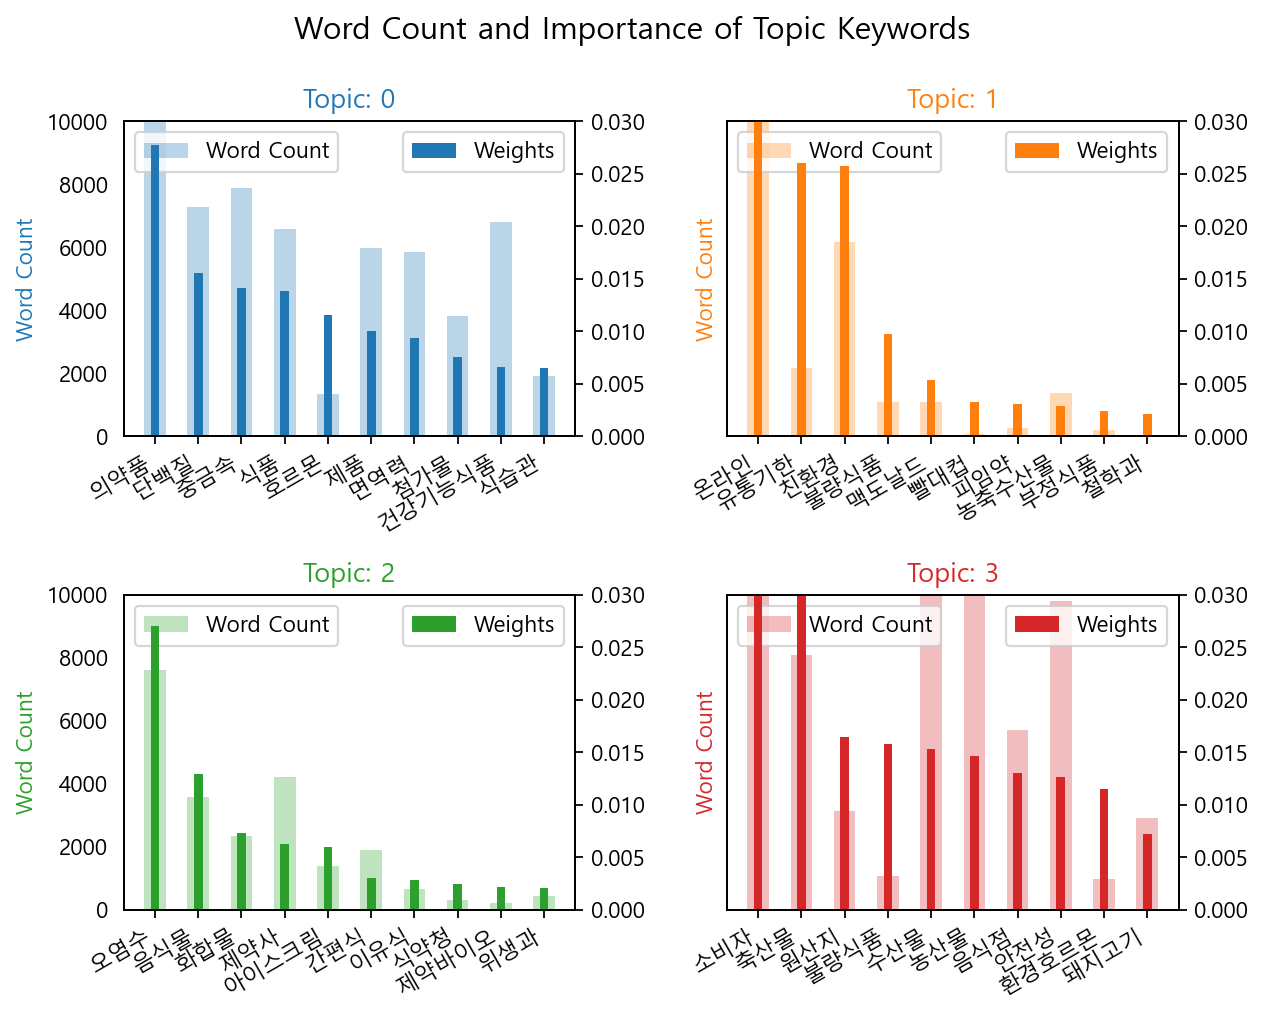

In [34]:
from collections import Counter
import matplotlib.colors as mcolors
topics = lda_model.show_topics(formatted=False)

data_ready = data_words
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=14, y=1.05)    
plt.show()

In [30]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=12, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=12, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=18, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

NameError: name 'mcolors' is not defined

In [29]:
data_ready = data_words

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

KeyboardInterrupt: 

In [34]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,1.0,"그동안,별자리,웬수,부모님,게자리,찜질방,금전운,황소자리,일들,대인관계,동아리회식,...","[시범판매,밀가루,농산물,밀산업,자급률,병해충,소비자,육성법,소비량,신규제품,16톤..."


In [160]:
# Display setting to show more characters in column
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,2,1.0,"그동안,별자리,웬수,부모님,게자리,찜질방,금전운,황소자리,일들,대인관계,동아리회식,...","[시범판매,밀가루,농산물,밀산업,자급률,병해충,소비자,육성법,소비량,신규제품,16톤..."


<AxesSubplot:>

Text(0.5, 1.0, 'Topic 0')

(-0.5, 2499.5, 1799.5, -0.5)

<AxesSubplot:>

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<AxesSubplot:>

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<AxesSubplot:>

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

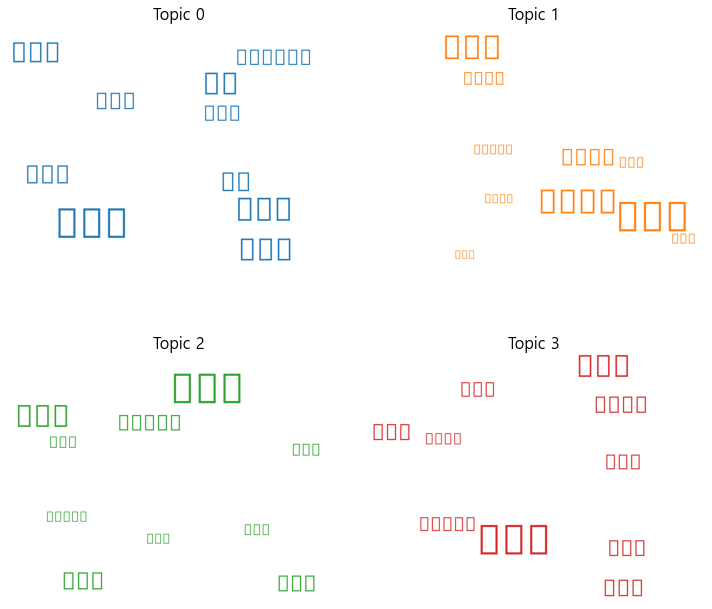

In [33]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0
                 )

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# To be continued

# Google Trend

## 5개 키워드만 추출하여 merge

In [22]:
from pytrends.request import TrendReq
# hl = host language, tz = timezone
pytrends = TrendReq(hl='ko', tz=540)
# build list of keywords
kw_list = vect.get_feature_names()

In [26]:
pytrends.build_payload(kw_list[0:5], timeframe='today 5-y', geo='KR')
sf = pytrends.interest_over_time()
gg = sf.drop('isPartial', axis=1).values
gg

array([[ 0,  1,  0, 48,  1],
       [ 1,  1,  0, 38,  1],
       [ 0,  0,  0, 41,  1],
       ...,
       [ 0,  1,  0, 80,  3],
       [ 0,  1,  0, 76,  3],
       [ 0,  0,  0, 53,  1]])

In [25]:
len(kw_list)

87

In [27]:
print('최종컬럼수', len(kw_list))
cycle = 5
l = len(kw_list)

for i in range(2, 20) :
    if len(kw_list) >= i*5 : 
        ((i-1)*5, i*5)
        # 구글검색어를 5개씩 한꺼번에 검색
        pytrends.build_payload(kw_list[(i-1)*5:i*5], timeframe='today 5-y', geo='KR')
        tf = pytrends.interest_over_time()
        gg = np.hstack([gg, tf.drop('isPartial', axis=1).values])
        # 전체 key word list를 누적하여 읽어감
        cycle += 5
        
    elif ((i*5) - l) < 5:
        print('잔여 컬럼', cycle+1, '~', l)
        (i*5) - l
        pytrends.build_payload(kw_list[cycle:l+1], timeframe='today 5-y', geo='KR')
        tf = pytrends.interest_over_time()
        tf
        gg = np.hstack([gg, tf.drop('isPartial', axis=1).values])
        
    else:
        pass
            
gg
gg.shape

최종컬럼수 87


(5, 10)

(10, 15)

(15, 20)

(20, 25)

(25, 30)

(30, 35)

(35, 40)

(40, 45)

(45, 50)

(50, 55)

(55, 60)

(60, 65)

(65, 70)

(70, 75)

(75, 80)

(80, 85)

잔여 컬럼 86 ~ 87


3

,화합물,환경,isPartial
date,,,
2017-06-18,1,60,False
2017-06-25,1,44,False
2017-07-02,2,47,False
2017-07-09,1,47,False
2017-07-16,1,52,False
...,...,...,...
2022-05-15,3,97,False
2022-05-22,3,100,False
2022-05-29,3,89,False


array([[ 0,  1,  0, ..., 26,  1, 60],
       [ 1,  1,  0, ..., 22,  1, 44],
       [ 0,  0,  0, ..., 34,  2, 47],
       ...,
       [ 0,  1,  0, ..., 66,  3, 89],
       [ 0,  1,  0, ..., 59,  4, 89],
       [ 0,  0,  0, ..., 19,  2, 71]])

(261, 87)

In [33]:
data = pd.DataFrame(gg, columns=kw_list)
data.head()

,bpa,가공식품,간편식,건강,건강관리,건강기능식품,건강식품,곰팡이,급식,급식소,...,친환경,특산물,프로바이오틱스,한국농수산식품유통공사,항산화,해수부,해양수산부,화학물질,화합물,환경
0,0,1,0,48,1,8,14,25,25,2,...,41,5,7,3,9,3,18,26,1,60
1,1,1,0,38,1,8,17,23,29,2,...,29,8,8,3,11,3,7,22,1,44
2,0,0,0,41,1,8,17,32,22,2,...,24,7,5,4,5,1,8,34,2,47
3,0,0,0,39,1,7,13,36,32,1,...,26,10,11,0,7,3,7,35,1,47
4,0,0,0,37,2,10,18,35,20,0,...,31,3,6,3,12,1,5,39,1,52


<AxesSubplot:>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
        66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5,
        77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 86.5]),
 [Text(0.5, 0, 'bpa'),
  Text(1.5, 0, '가공식품'),
  Text(2.5, 0, '간편식'),
  Text(3.5, 0, '건강'),
  Text(4.5, 0, '건강관리'),
  Text(5.5, 0, '건강기능식품'),
  Text(6.5, 0, '건강식품'),
  Text(7.5, 0, '곰팡이'),
  Text(8.5, 0, '급식'),
  Text(9.5, 0, '급식소'),
  Text(10.5, 0, '냉장고'),
  Text(11.5, 0, '농가'),
  Text(12.5, 0, '농기계'),
  Text(13.5, 0, '농림축산식품부'),
  Text(14.5, 0, '농민들'),
  Text(15.5, 0, '농산물'),
  Text(16.5, 0, '농수산물'),
  Text

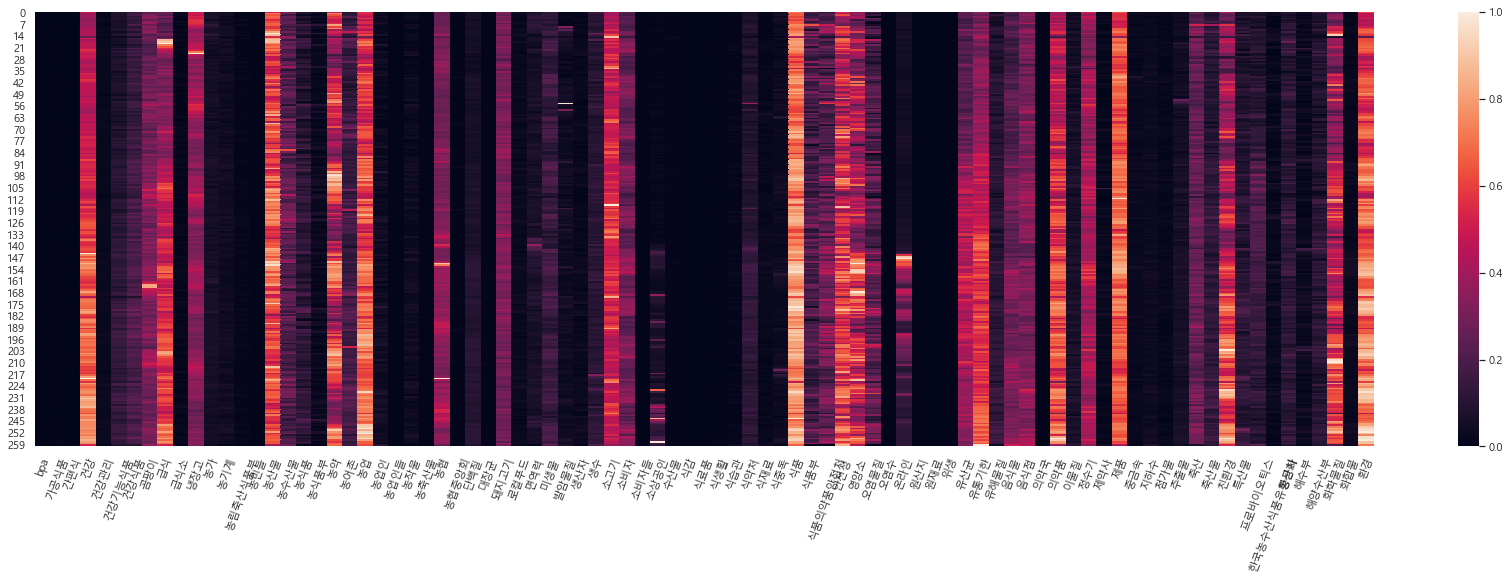

In [54]:
sns.set(rc = {'figure.figsize':(30,8)})
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
sns.heatmap(data/np.max(gg))
plt.xticks(rotation=70) 

<Figure size 1800x360 with 0 Axes>

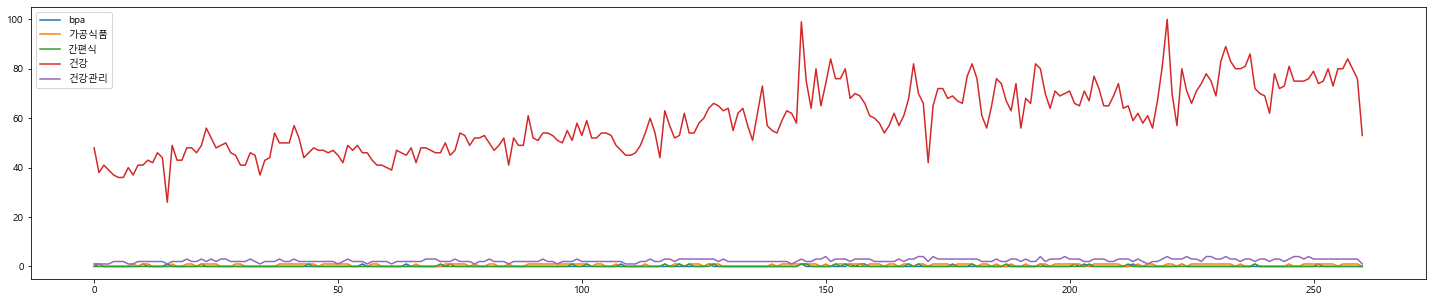

In [42]:
plt.figure(figsize=(25, 5))
for i in range(0, 5): #len(data)):
    # plot all five trends in same chart
    ax = plt.plot(data.index, data[data.columns[i]])
    plt.legend(data.columns)

## 기간별 LDA

In [26]:
# 시작년도, 끝년도 지정
start_year = 2017
end_year = 2022

corpus = [""] * len(df)

result_df = pd.DataFrame()

# 녇도별 문서 추출 후 키워드 빈도수 분석

for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_index = (df['일자'] >= start_date) & (df['일자'] <= end_date)
    temp_df = df[dt_index]

    # twitter 단어 추출이 필요없음
    #for i, fn in enumerate(temp_df['특성추출(가중치순 상위 50개)']) :
    #    corpus[i] = " ".join(twitter.nouns(fn))
    
    corpus = []
    for keywords in temp_df['특성추출(가중치순 상위 50개)']:
        corpus.append(keywords)    
       
        
    vect = CountVectorizer(stop_words = stop_words, ngram_range=(1, 1), min_df= 0.0025, max_df= 0.9)
    X = vect.fit_transform(corpus)
    X = TfidfTransformer().fit_transform(X)
        
    count = X.toarray().sum(axis=0)
    idx = np.argsort(-count)
    count = count[idx]

    feature_name = np.array(vect.get_feature_names())[idx]

    result = list(zip(feature_name, count))
    result = pd.DataFrame(result)
    result.columns=[str(year) + ' 키워드','빈도수']
    result_df = pd.concat([result_df,result],axis=1)
    
result_df.head(50)

  0%|          | 0/6 [00:00<?, ?it/s]

,2017 키워드,빈도수,2018 키워드,빈도수,2019 키워드,빈도수,2020 키워드,빈도수,2021 키워드,빈도수,2022 키워드,빈도수
0,소비자,829.341026,소비자,1659.067790,소비자,2400.647981,온라인,4735.762956,온라인,13586.820975,온라인,4928.288048
1,중금속,788.592763,의약품,1062.291595,중금속,1408.668392,소비자,3602.701507,소비자,10012.355064,소비자,3052.630580
2,발암물질,583.053085,중금속,981.049920,의약품,1386.414811,의약품,2444.120982,농산물,7949.815063,농산물,2021.680762
3,의약품,477.224446,발암물질,963.856218,오염수,1170.336320,식품부,2199.296961,의약품,7579.733212,소상공인,1749.956481
4,곰팡이,457.031902,식약처,785.813674,온라인,1080.015394,농산물,2131.472717,식약처,5644.130646,의약품,1536.238646
5,식약처,433.928668,곰팡이,663.483467,곰팡이,952.983526,농식품부,2054.671608,수산물,4693.373420,식약처,899.886544
6,대장균,376.820928,건강기능식품,617.404833,식약처,911.896662,축산물,1745.957735,오염수,4164.020026,친환경,861.929662
7,첨가물,332.518211,온라인,587.339606,건강기능식품,873.332761,식약처,1679.100081,안전성,3302.040929,수산물,856.859212
8,유해물질,327.570102,소비자들,569.035399,농산물,753.450999,농림축산식품부,1611.234795,소상공인,3301.750530,농업인,757.399849
9,소비자들,310.384206,제품,450.787471,발암물질,739.816850,안전성,1405.799121,식품부,3155.148667,안전성,718.104660


In [27]:
# 코로나 전후 지정, 1은 코로나 이후 0은 코로나 발생 이전

df['코로나전후'] = 1
df.loc[df['일자'] < '2020-01-20', '코로나전후'] = 0

corpus = [""] * len(df)

result_df = pd.DataFrame()

# 녇도별 문서 추출 후 키워드 빈도수 분석

for corona in tqdm_notebook(range(2)):
    
    temp_df = df[df['코로나전후'] == corona]
    
    corpus = []
    for keywords in temp_df['특성추출(가중치순 상위 50개)']:
        corpus.append(keywords)    
       
        
    vect = CountVectorizer(stop_words = stop_words, ngram_range=(1, 1), min_df= 0.005, max_df= 0.8)
    X = vect.fit_transform(corpus)
    X = TfidfTransformer().fit_transform(X)
        
    count = X.toarray().sum(axis=0)
    idx = np.argsort(-count)
    count = count[idx]

    feature_name = np.array(vect.get_feature_names())[idx]

    result = list(zip(feature_name, count))
    result = pd.DataFrame(result)
    result.columns=['코로나_' + str(corona) + ' 키워드', '빈도수']
    result_df = pd.concat([result_df,result],axis=1)

    
result_df.head(50)

  0%|          | 0/2 [00:00<?, ?it/s]

,코로나_0 키워드,빈도수,코로나_1 키워드,빈도수
0,소비자,5454.732395,온라인,24332.103978
1,중금속,3418.887238,소비자,18406.806693
2,의약품,3278.051835,농산물,14226.535893
3,발암물질,2430.245386,의약품,11913.989722
4,식약처,2387.470569,식약처,8550.029486
5,곰팡이,2232.026040,수산물,7771.193969
6,온라인,2167.044519,식품부,6891.484078
7,건강기능식품,1887.500027,농식품부,5965.442622
8,소비자들,1730.955227,소상공인,5856.502190
9,농산물,1643.211180,안전성,5612.787967


In [28]:
from pytrends.request import TrendReq
# hl = host language, tz = timezone
pytrends = TrendReq(hl='ko', tz=540)
# build list of keywords

<Figure size 1440x216 with 0 Axes>

,소비자,중금속,의약품,발암물질,식약처,isPartial
date,,,,,,
2017-06-18,22,2,27,2,9,False
2017-06-25,19,9,26,1,10,False
2017-07-02,18,4,26,1,11,False
2017-07-09,23,4,29,2,12,False
2017-07-16,17,3,22,2,12,False


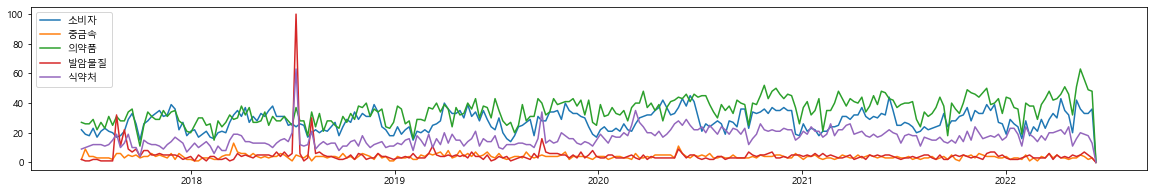

<Figure size 1440x216 with 0 Axes>

,곰팡이,온라인,건강기능식품,소비자들,농산물,isPartial
date,,,,,,
2017-06-18,0,5,0,0,0,False
2017-06-25,0,5,0,0,0,False
2017-07-02,0,5,0,0,0,False
2017-07-09,0,5,0,0,0,False
2017-07-16,0,6,0,0,0,False


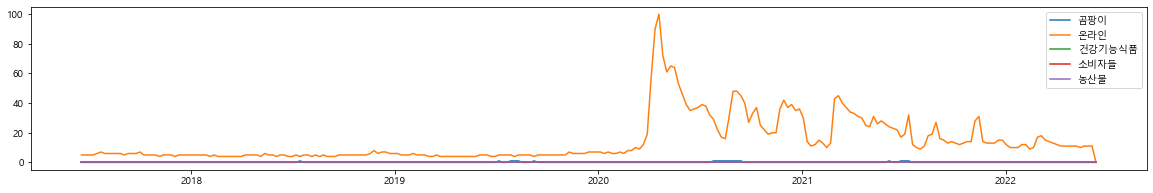

<Figure size 1440x216 with 0 Axes>

,첨가물,대장균,단백질,안전성,오염수,isPartial
date,,,,,,
2017-06-18,4,3,45,11,1,False
2017-06-25,2,2,42,8,1,False
2017-07-02,3,8,51,11,1,False
2017-07-09,2,5,44,8,1,False
2017-07-16,5,6,41,6,1,False


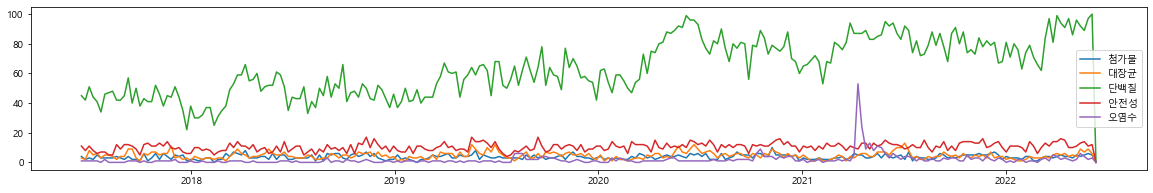

<Figure size 1440x216 with 0 Axes>

,제품,건강,면역력,유해물질,식품의약품안전처,isPartial
date,,,,,,
2017-06-18,23,47,1,0,0,False
2017-06-25,20,38,2,1,1,False
2017-07-02,20,41,2,2,0,False
2017-07-09,20,39,3,1,0,False
2017-07-16,22,37,3,1,0,False


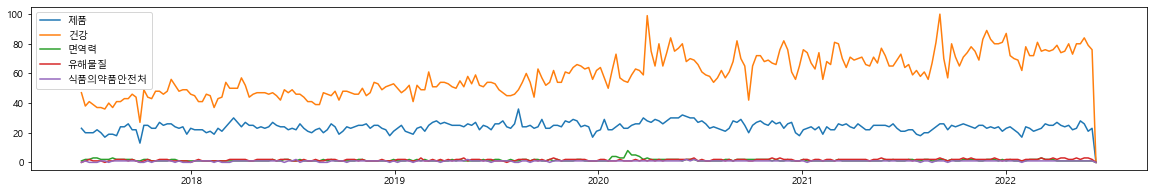

In [31]:
for i in range(1, 5):
    pytrends.build_payload(result_df['코로나_0 키워드'].to_list()[(i-1)*5:i*5], timeframe='today 5-y', geo='KR')
    plt.figure(figsize=(20,3))
    # store interest over time information in df
    df = pytrends.interest_over_time()
    df.head()
    # plot all five trends in same chart
    plt.plot(df.index, df[df.columns[0]])
    plt.plot(df.index, df[df.columns[1]])
    plt.plot(df.index, df[df.columns[2]])
    plt.plot(df.index, df[df.columns[3]])
    plt.plot(df.index, df[df.columns[4]])
    plt.legend(df.columns)
    plt.show()